# Naive Bayes


This notebook uses a **Naive Bayes** classifier, a generative model, to solve the classification task of digits labeling.

## Packages import

In [1]:
import os.path

import pandas as pd
from sklearn.model_selection import train_test_split

from assignment_2.digits_classifiers.model import Dataset
from assignment_2.digits_classifiers.classifiers import NaiveBayes
from assignment_2.digits_classifiers.io import read_datasets

## Import dataset

Reading [MNIST handwritten digits]((https://yann.lecun.com/exdb/mnist/)) dataset.

In [2]:
data = read_datasets()

2022-12-26 16:50:20.959 | INFO     | assignment_2.digits_classifiers.io:read_datasets:46 - Reading datasets


In [3]:
X, y = data

## Train Test split

Splitting train and test set with **proportion 4:1**

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)

Combining feature space and labels

In [5]:
train = Dataset(x=X_train, y=y_train)
test = Dataset(x=X_test, y=y_test)

Digit distribution in the training set:

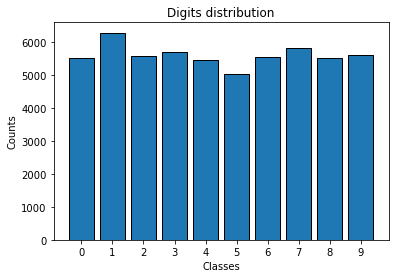

In [6]:
train.digit_distribution()

## Plotting the mean distribution

Plotting a visual representation of the mean of the **beta distribution** for each pixel:

In [7]:
import numpy as np
from assignment_2.digits_classifiers.utils import chunks, plot_digit

C:\Users\user\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
2022-12-26 16:50:27.383 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\0_mean
2022-12-26 16:50:27.535 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\1_mean
2022-12-26 16:50:27.725 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\2_mean
2022-12-26 16:50:27.933 | INFO     | assignment_2.digits_classifiers.utils:plot_digit:77 - Saving C:\Users\u

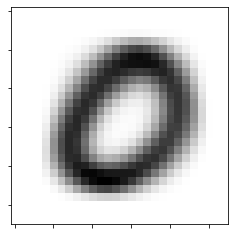

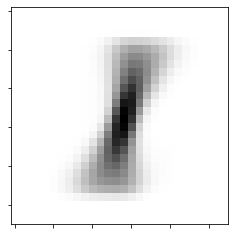

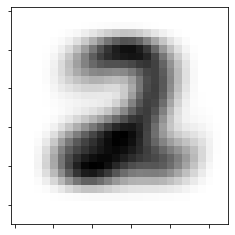

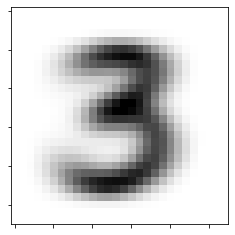

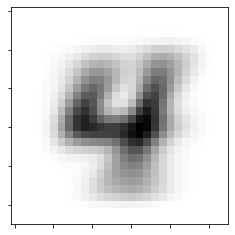

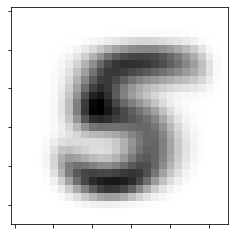

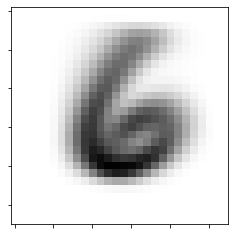

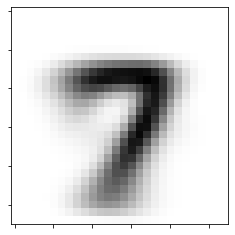

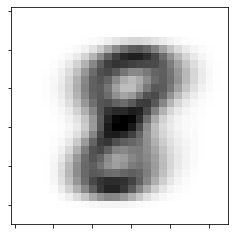

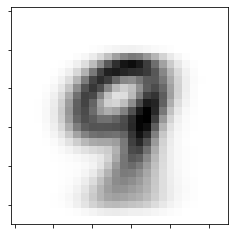

In [8]:
def mean_distribution():
    for i in range(10):
        pixels = np.mean(X.loc[y==i])
        chunks_ = chunks(lst=pixels, n=28)
        plot_digit(pixels=chunks_, save=True, file_name=f"{i}_mean")

mean_distribution()

## Experimental Evaluation

### Training phase

Generating the classifier

In [9]:
nb = NaiveBayes(train=train, test=test)

Training the model. We get division by zero warning, the case is handled internally by the class.

In [10]:
%%time
nb.train()

Wall time: 776 ms


Evaluating predictions

In [11]:
%%time
nb.predict()

Wall time: 1min 57s


Counting how many where not classified as digits:

In [12]:
not_classified = list(np.where(pd.isna(nb.predicted))[0])
len(not_classified)

37

NaiveBayes didn't classfify 31 images, let's plot them:

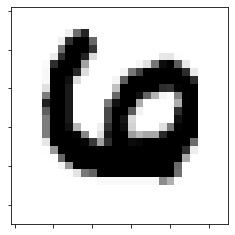

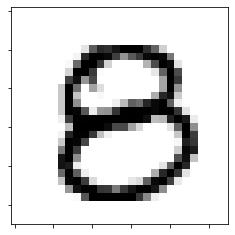

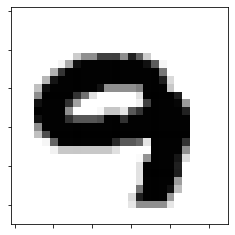

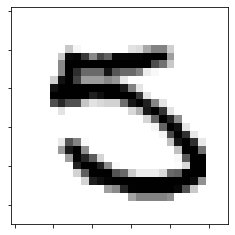

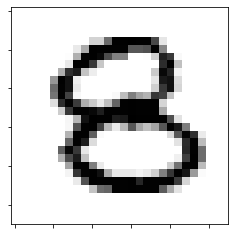

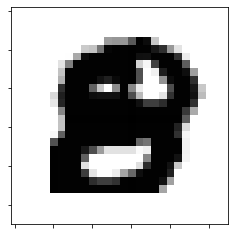

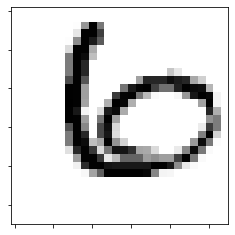

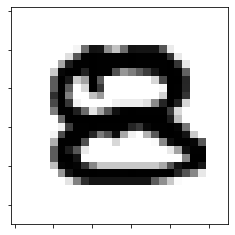

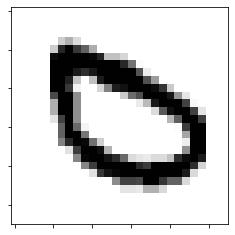

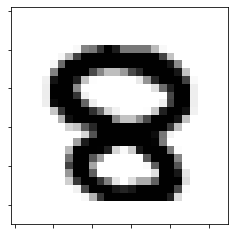

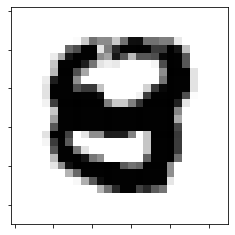

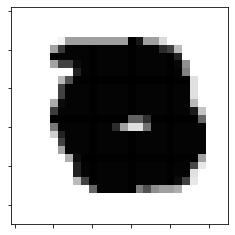

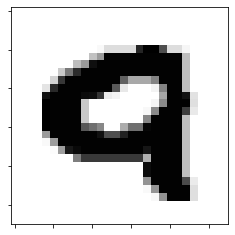

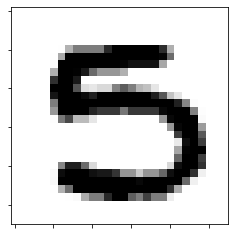

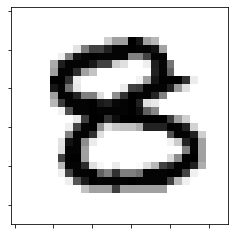

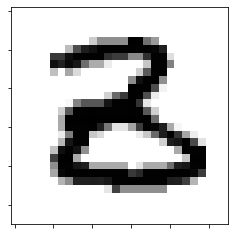

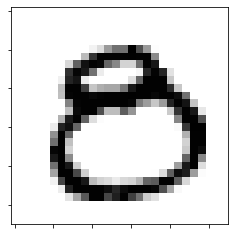

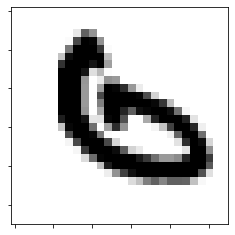

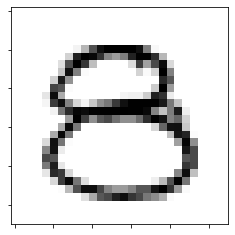

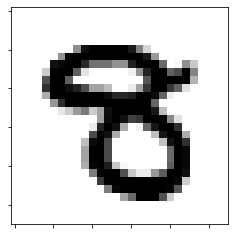

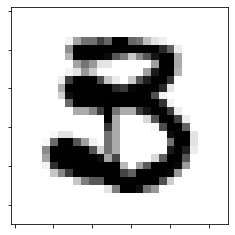

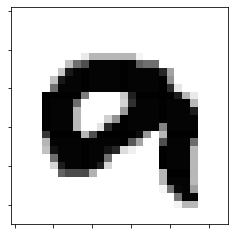

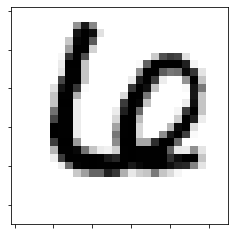

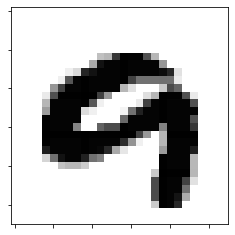

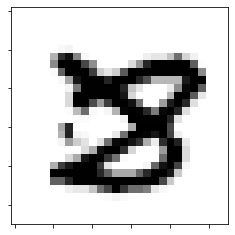

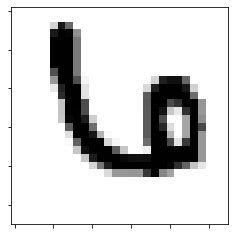

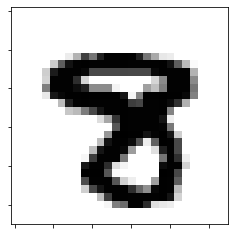

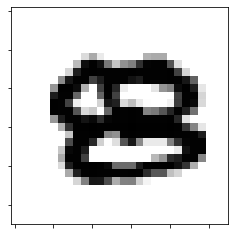

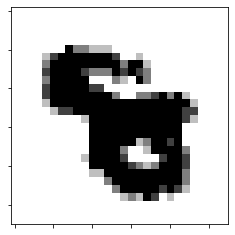

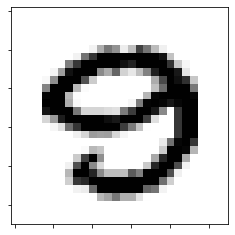

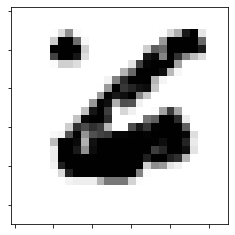

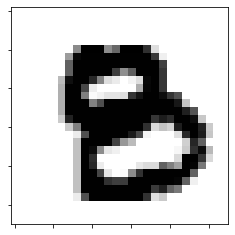

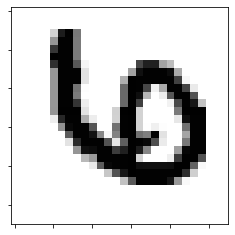

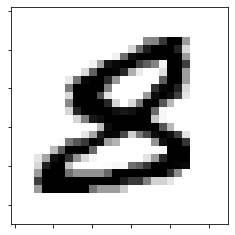

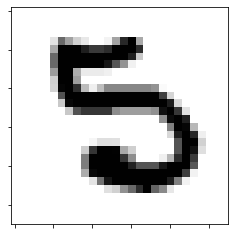

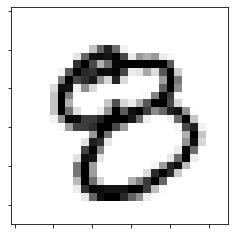

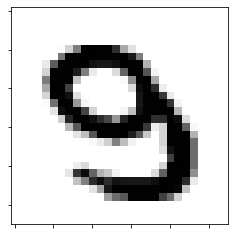

In [13]:
for idx in not_classified:
    chunks_ = chunks(lst=X_test.iloc[idx, :], n=28)
    plot_digit(pixels=chunks_)

Accuracy on the Test set:

In [14]:
nb.accuracy

0.8404354365107785

Plotting confusion matrix:

2022-12-26 16:52:33.341 | INFO     | assignment_2.digits_classifiers.model:confusion_matrix:209 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_2\digits_classifiers\images\bayes_cm


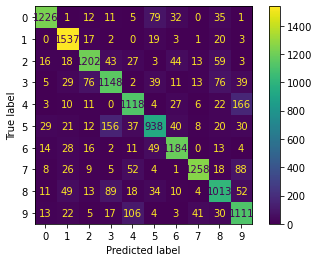

In [15]:
nb.confusion_matrix(save=True, file_name="bayes_cm")

## Fool data

Studying behaviour of the classifier over fool data

In [16]:
import numpy as np

from assignment_2.digits_classifiers.io import read_fool_dataset
from assignment_2.digits_classifiers.utils import chunks, plot_digit

def get_one_class_dataset() -> pd.DataFrame:
    return pd.concat(
        [ X.loc[y==i].head(1) for i in range(len(set(y))) ]
    )

def get_with_fool_dataset() -> pd.DataFrame:
    with_fool = pd.concat([
        get_one_class_dataset(),
        read_fool_dataset()
    ])
    return with_fool.reset_index(drop=True)

with_fools = np.array(get_with_fool_dataset())

Creating simple one-for-sample dataset

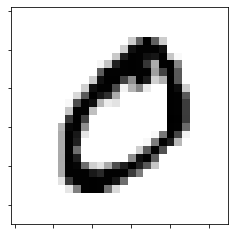

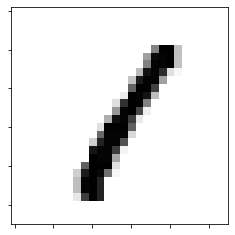

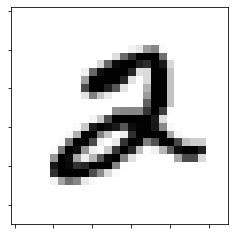

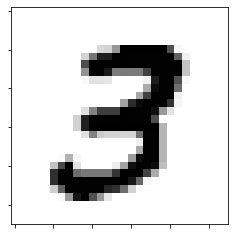

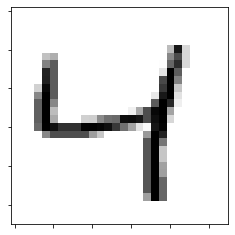

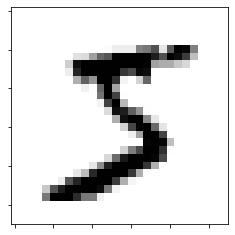

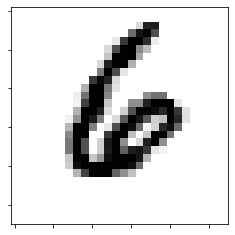

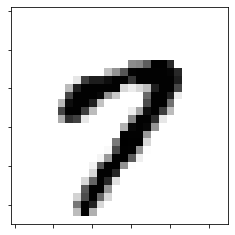

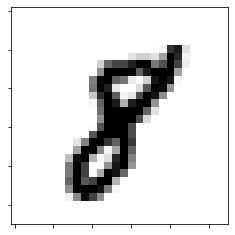

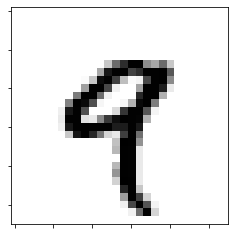

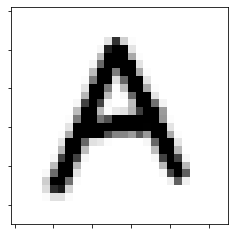

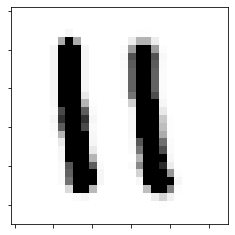

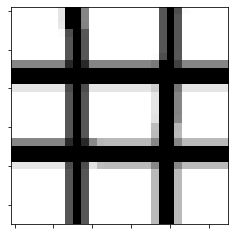

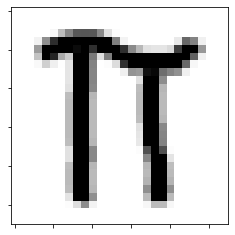

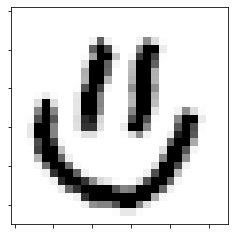

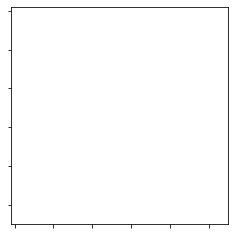

In [17]:
def plot_with_fools():
    for i in range(with_fools.shape[0]):
        chunks_ = chunks(lst=with_fools[i], n=28)
        plot_digit(pixels=chunks_)

plot_with_fools()

In [18]:
def get_products():

    labels = [i for i in range(10)]

    # probability products associated to each label
    products = [{ label: prod for prod, label in nb.estimator._labels_products(with_fools[i])} for i in range(len(with_fools))]

    # product converted to dictionary
    as_dict = {
        l : [product[l] for product in products]
        for l in labels
    }

    # convert to dataframe
    df = pd.DataFrame(as_dict)

    # set index
    df.set_index([[str(i) for i in range(10)] + ['A', 'eleven', 'grid', 'pi', 'smile', 'empty']], inplace=True)

    return df

Probability of each label:

In [19]:
df = get_products()
df

,0,1,2,3,4,5,6,7,8,9
0,3.112121e-203,0.000000e+00,1.530718e-278,1.230711e-276,1.282110e-300,1.867622e-250,1.062465e-285,0.000000e+00,4.606744e-278,1.182549e-310
1,1.750889e-242,1.180335e-122,1.586641e-170,4.232078e-183,6.890579e-187,2.513430e-175,3.864850e-207,1.570263e-197,1.119477e-162,1.679102e-196
2,8.417243e-288,0.000000e+00,6.705211e-239,2.143653e-284,9.586055e-283,1.435381e-267,7.193495e-275,1.471443e-306,1.541833e-259,1.094333e-285
3,2.582798e-277,0.000000e+00,4.410029e-255,5.221372e-223,4.850183e-281,2.507467e-242,1.540256e-305,5.111730e-307,3.355669e-228,1.694716e-275
4,1.843260e-319,0.000000e+00,9.951403e-294,1.337561e-295,1.176866e-246,8.726434e-291,1.327031e-316,5.121555e-286,6.124230e-318,4.012365e-284
5,2.057386e-271,1.836018e-303,1.486831e-258,3.037466e-227,3.377268e-274,3.187174e-224,5.412984e-252,0.000000e+00,4.059689e-240,9.278122e-279
6,0.000000e+00,0.000000e+00,4.537848e-254,1.309676e-294,5.181672e-273,2.407204e-270,3.433121e-210,0.000000e+00,4.042839e-256,0.000000e+00
7,1.795627e-254,5.831569e-307,1.226123e-255,1.462873e-261,1.826047e-217,4.296196e-229,1.705265e-239,2.195867e-176,1.731797e-236,3.384299e-196
8,4.061229e-285,3.446070e-234,1.689985e-239,6.548608e-245,1.092275e-252,1.051004e-226,2.128603e-265,1.727739e-258,1.317044e-203,4.672366e-245
9,8.913626e-266,5.876575e-269,1.270368e-239,8.226870e-249,3.372985e-191,4.612044e-220,5.436619e-226,1.261913e-197,2.471830e-222,8.999133e-170


Saving the dataset

In [20]:
from assignment_2.digits_classifiers.settings import get_root_dir, DATASETS

out = os.path.join(get_root_dir(), DATASETS, "bayes_fools.csv")
df.to_csv(out)